<a href="https://colab.research.google.com/github/nataliacsp/jupyter-exploration/blob/main/Module2Assignment_Solorzano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
# Load dataset using ucimlrepo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Separate features (X) and target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

In [20]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Impute missing values in training and test sets (replacing NaNs with the mean of the column)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [23]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_imputed, y_train)

# Predictions for Logistic Regression
y_pred_log = log_reg.predict(X_test_imputed)
y_prob_log = log_reg.predict_proba(X_test_imputed)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"ROC-AUC Score (Logistic Regression): {roc_auc_score(y_test, y_prob_log, multi_class='ovr')}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61

Accuracy: 0.5409836065573771
ROC-AUC Score (Logistic Regression): 0.7711729035231758


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning

In [24]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_imputed, y_train)

# Predictions for Random Forest
y_pred_rf = rf_clf.predict(X_test_imputed)
y_prob_rf = rf_clf.predict_proba(X_test_imputed)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC-AUC Score (Random Forest): {roc_auc_score(y_test, y_prob_rf, multi_class='ovr')}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61

Accuracy: 0.4918032786885246
ROC-AUC Score (Random Forest): 0.7444890204596583


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


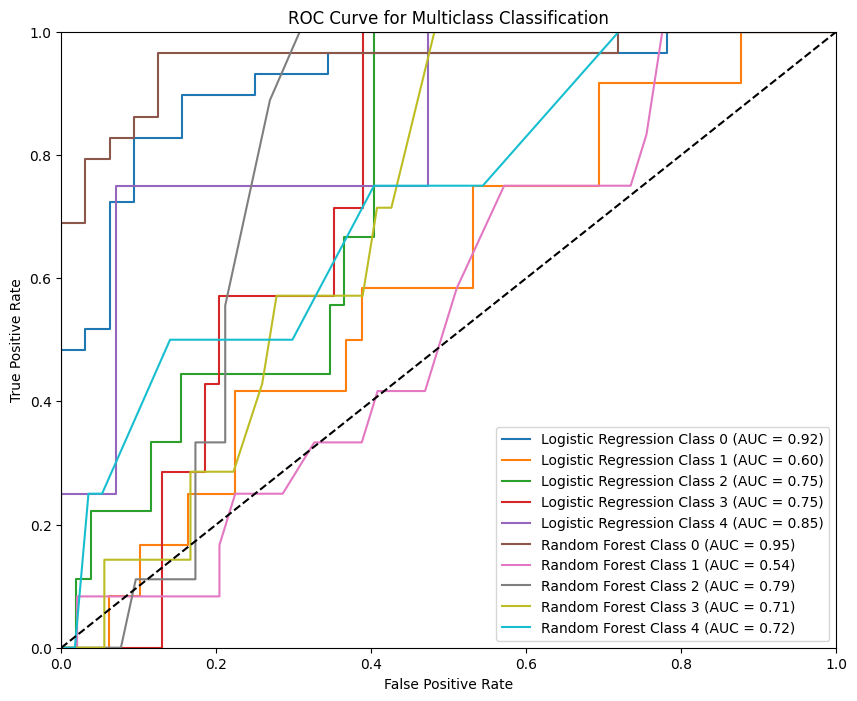

In [25]:
# Plot ROC curve for both models for each class
plt.figure(figsize=(10, 8))

# Iterate over each class for Logistic Regression
for i in range(len(log_reg.classes_)):
    fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test_imputed)[:, i], pos_label=i)
    roc_auc_log = auc(fpr_log, tpr_log)
    plt.plot(fpr_log, tpr_log, label=f'Logistic Regression Class {i} (AUC = {roc_auc_log:.2f})')

# Iterate over each class for Random Forest
for i in range(len(rf_clf.classes_)):
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test_imputed)[:, i], pos_label=i)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Class {i} (AUC = {roc_auc_rf:.2f})')

# Common plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()